## Does movie budget have a correlation with how good a movie is?
Created by: Nabil Ridhwan

### To get started lets see how we are going to consider a movie to be good or bad
We are going to use datasets from IMDB and Rotten Tomatoes to determine how good a movie is. We will use the IMDB rating as a measure of how good a movie is. We will also use the Rotten Tomatoes rating as a measure of how good a movie is. We will then use the average of the two ratings as a measure of how good a movie is.

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
top_500_movies = pd.read_csv('./data/top-500-movies.csv')
imdb_top_1000 = pd.read_csv('./data/imdb_top_1000.csv')
movie_dataset = pd.read_csv('./data/Movie-Dataset-Latest.csv')

# Print the heads
# print(top_500_movies.head())
# print(imdb_top_1000.head())
# print(movie_dataset.head())

# Rename the columns for imdb data from Series_Title to title
imdb_top_1000.rename(columns={'Series_Title': 'title'}, inplace=True)


# Get only several columns from the dataset
movie_dataset = movie_dataset[['title', 'popularity', 'vote_average']]

# Set the indexes to be the title of the movie
top_500_movies.set_index('title', inplace=True)
imdb_top_1000.set_index('title', inplace=True)
movie_dataset.set_index('title', inplace=True)

# Join both data together by index
joined_data = top_500_movies.join((movie_dataset, imdb_top_1000), how='inner')

# Sort the values by 'rank'
joined_data.sort_values(by='rank', inplace=True)
joined_data['joined_ratings'] = joined_data[['IMDB_Rating', 'Meta_score', 'vote_average']].mean(axis=1)


<Figure size 640x480 with 0 Axes>

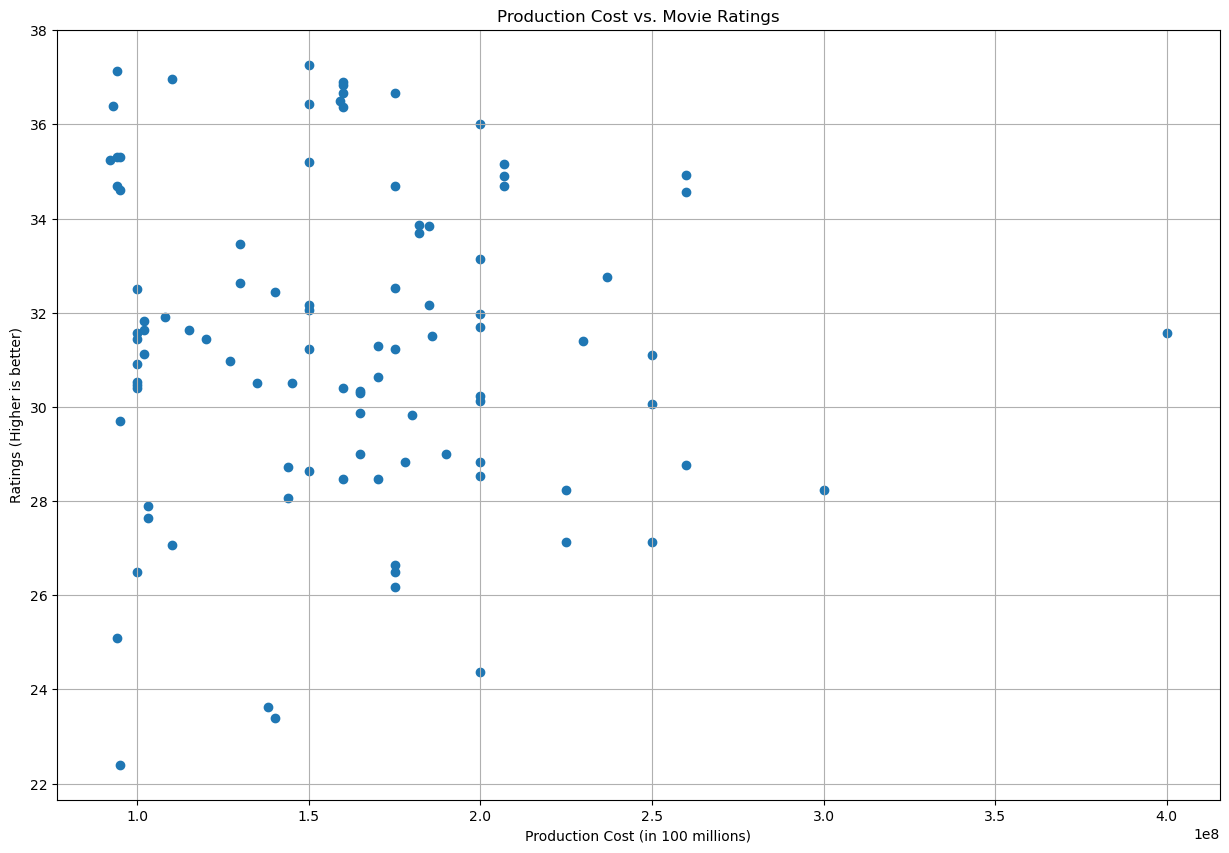

In [6]:
# Scatter plot of rank vs. IMDB_Rating

plt.figure(figsize=(15, 10))
plt.grid()
plt.scatter(joined_data['production_cost'], joined_data['joined_ratings'])
plt.xlabel('Production Cost (in 100 millions)')
plt.ylabel('Ratings (Higher is better)')
plt.title('Production Cost vs. Movie Ratings')
plt.show()
